# Word Cloud

Words from lessons on LearnMien.com

Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings 
warnings.filterwarnings('ignore')

import nltk
#nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Low\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Read in data

In [2]:
df = pd.read_csv('learnmienLessons.csv')

Looking at the shape of the dataframe

In [13]:
df.shape

(143, 2)

Previewing the dataframe with head

In [14]:
df.head()

,lesssons,sentences
0,5,Maa caauv jaux
1,5,Caauv ziangx jaux
2,5,Gauv hiuz hnaangx
3,5,Hiuz ziangx hnaangx
4,5,Gauv nyanc hnaangx caux jaux


Tokenizing all sentences in the dataframe

In [6]:
all_tokenized = []
for i in range(len(df)):
    tokenized = nltk.word_tokenize(df.sentences[i])
    #print(tokenized)
    for i in tokenized:
        i = i.replace(".","donotaddoolist")
        i = i.replace(",","donotaddoolist")
        i = i.replace("``","donotaddoolist")
        i = i.replace("''","donotaddoolist")
        i = i.replace("?","donotaddoolist")
        i = i.lower()
        if i != "donotaddoolist":
            all_tokenized.append(i)

Get count of word frequency (top 20 words)

In [8]:
fdist = nltk.FreqDist(all_tokenized)
wordCloudText = fdist.most_common(20)
wordCloudText

[('nyei', 55),
 ('mingh', 50),
 ('gauv', 44),
 ('daaih', 39),
 ('maiv', 35),
 ('ninh', 33),
 ('meix', 31),
 ('nyanc', 30),
 ('jienv', 30),
 ('caux', 26),
 ('deix', 26),
 ('maa', 24),
 ('aqv', 24),
 ('hnaangx', 22),
 ('oix', 22),
 ('naaic', 20),
 ('mbuo', 17),
 ('duqv', 16),
 ('liuz', 16),
 ('hnoi', 15)]

Create a text variable of all sentences

In [9]:
text = " ".join(words for words in df.sentences)
print ("There are {} words in the combination of all lessons.".format(len(text)))

There are 8340 words in the combination of all lessons.


Open the logo.png for the mask

In [10]:
image_mask = np.array(Image.open("logo.png"))

Create a word cloud object

In [11]:
wordcloud = WordCloud(max_font_size=200,
                      max_words=400,
                      mask=image_mask,
                      contour_width=3,
                      contour_color='white',
                      background_color="black").generate(text)

Plotting the word cloud with image mask

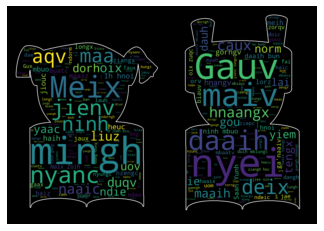

In [12]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()